customer segmentation helps in different marketing strategy

goal is to find different shopping groups based on demographics criteria(age, income, mall shopping score, ....) to better understand the target for marketing activities.

steps:
EDA
Kmeans
create clusters 
visualize

Univariate analysis
Bivariate analysis
Multivariate analysis

expected result

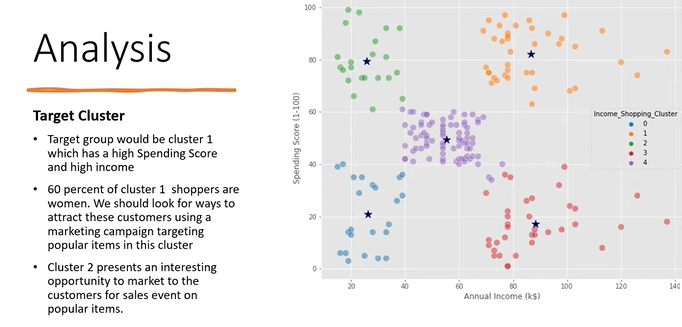

In [1]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariate analysis(only on numerical data) 

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


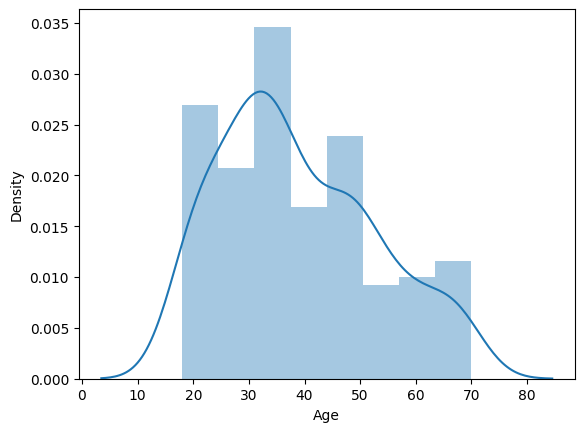

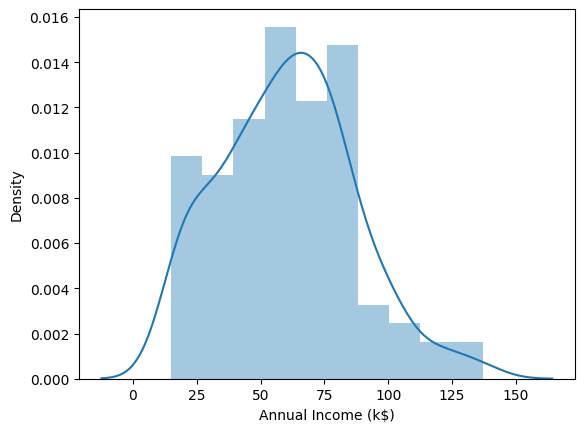

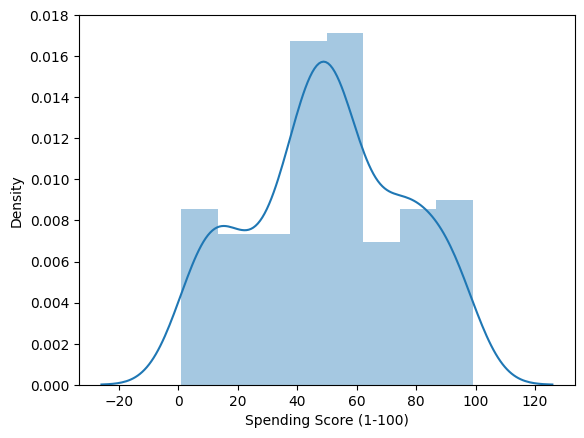

In [9]:
cols = ['Age','Annual Income (k$)','Spending Score (1-100)']
for c in cols:
    plt.figure() # means each one in a separate figure
    sns.distplot(df[c]);

### Conclusion:
    seems all above data is normal distributed


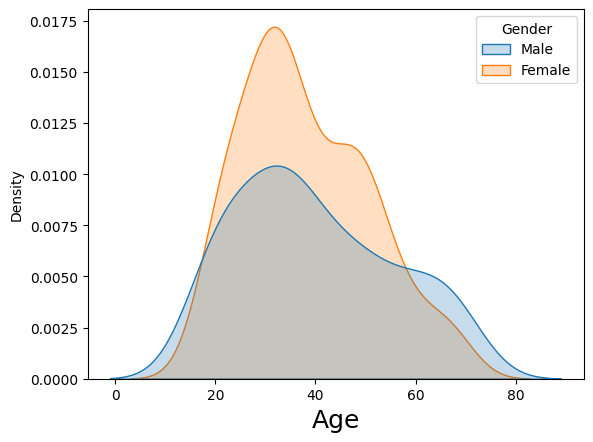

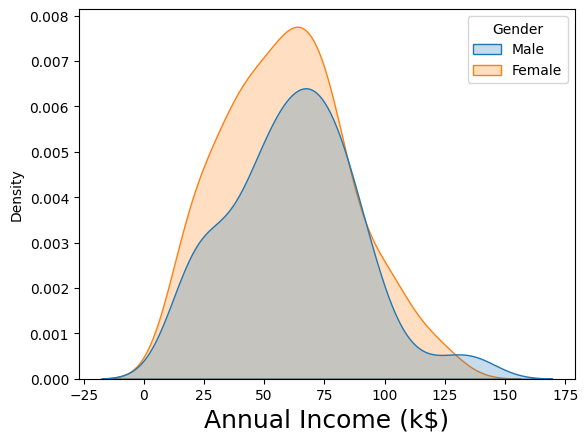

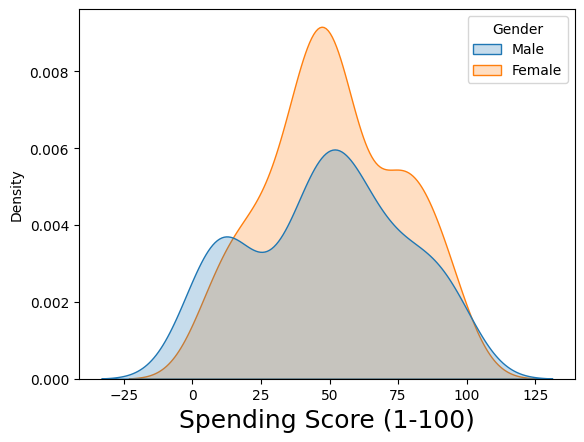

In [20]:
for c in cols:
    plt.figure()
    sns.kdeplot(data=df, x=c, shade=True, hue='Gender');
    plt.xlabel(c, fontsize=18)


## Conclusion:

- shape 1:
    female around age 20-40 spend the most.
    the long right tail for men shows we propably have outlier in that part.

- shape 2:
    female with annual income 50-75 spend the most.
    the long right tail for men shows we propably have outlier in that part.

- shape 3:
    female with spending score 35-60 spend the most.
    the left tail for men shows ???



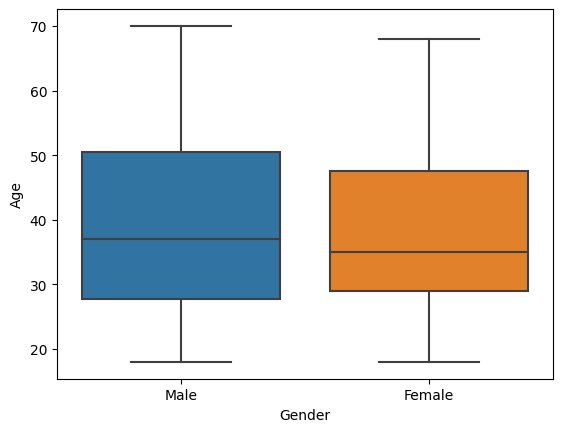

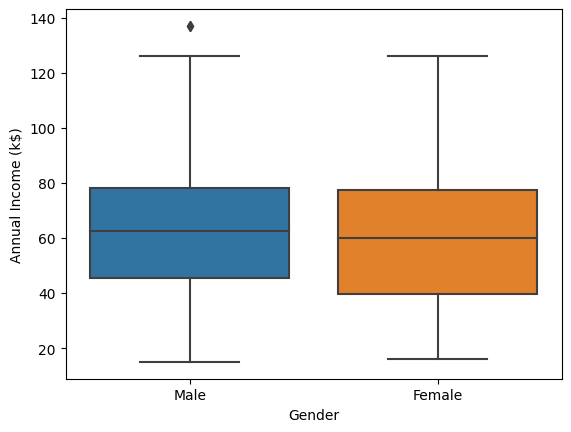

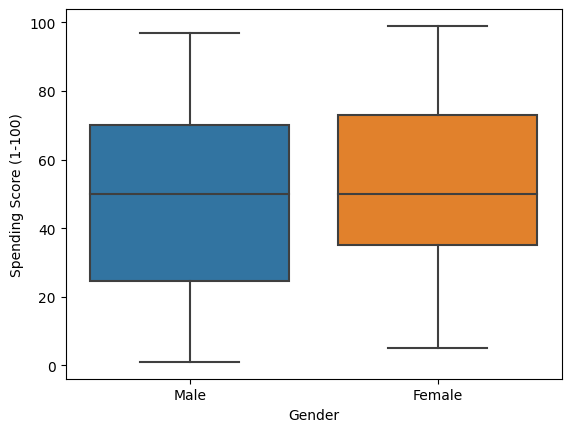

In [22]:
for c in cols:
    plt.figure()
    sns.boxplot(data=df, x = 'Gender', y=c);
#     plt.xlabel(c, fontsize=18)

## Conclusion:

- shape 1:
    median Age for men a little bot higher than female.
    big box means data is concentrated between 25-70 for male and 32-72 for female.

- shape 2:
    outlier in male Annual Income.


In [23]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## Bivariate analysis(only on numerical data) 

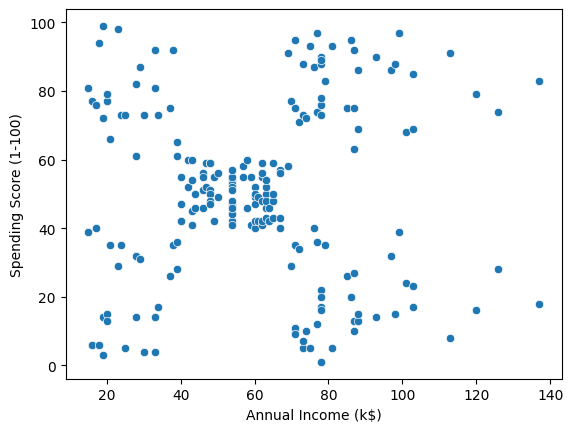

In [25]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' );

## Conclusion:

- we can see clusters visually



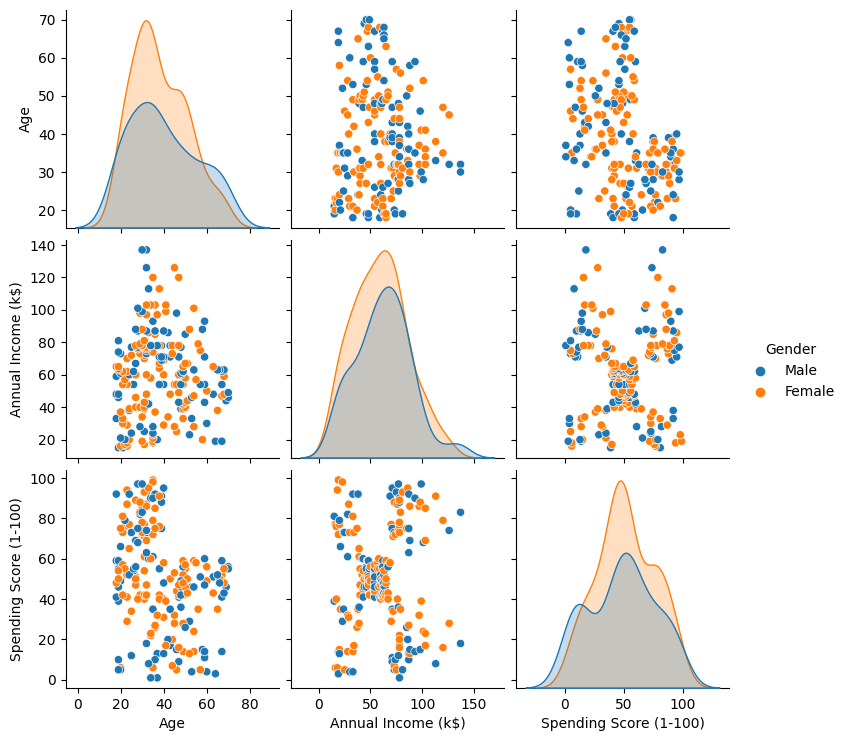

In [30]:
df = df.drop('CustomerID', axis=1)
sns.pairplot(df,hue='Gender')

In [32]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()



,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [34]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

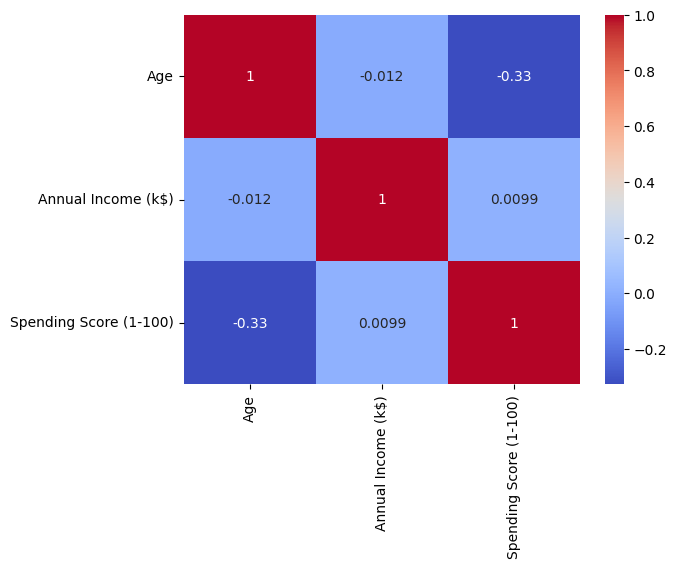

In [35]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## Conclusion:

- spending has a negative correlation with 


# Kmeans Algo for Univariate, Bivariate, and Multivariate clustering

In [39]:
clustering1 = KMeans()
clustering1.fit(df[['Annual Income (k$)']])

KMeans()

clustering1.labels_

In [41]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [42]:
df['Income Cluster'].value_counts()

1    40
3    36
0    32
7    28
5    26
6    18
2    14
4     6
Name: Income Cluster, dtype: int64

### Conclusion:
    here KMeans select number of clusters to be 8.
    from results we see, majority are in cluster 2.
    
    but we need to find the optimal number of clusters.
    
    since we dont know the optimal number of clusters, we use elbow method

    inertia_ is the distance between centroids --> we want it to be optimal 


In [48]:
# inertia is the distance between centroids --> we want it to be optimal 
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [49]:
intertia_scores

[137277.28000000003,
 48660.88888888888,
 23517.33093093093,
 13278.112713472487,
 8481.496190476191,
 5050.9047619047615,
 3931.988095238095,
 2822.499694749695,
 2168.478715728716,
 1737.1612554112553]

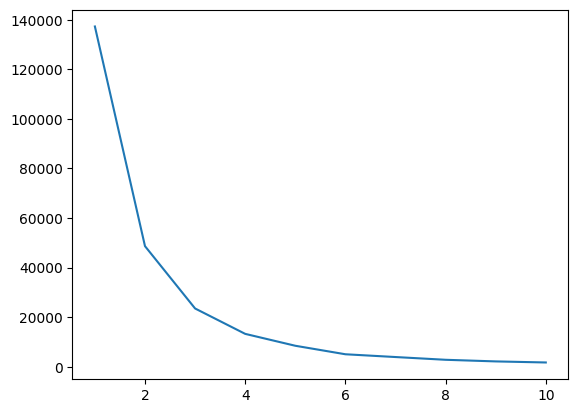

In [50]:
plt.plot(range(1,11),intertia_scores)

### Conclusion:
    from above we can select 3 as number of clusters and redo the clustering with this number

In [58]:
clustering = KMeans(n_clusters=3)
clustering.fit(df[['Annual Income (k$)']])
df['Income Cluster'] = clustering.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income Cluster2
0,Male,19,15,39,1,0
1,Male,21,15,81,1,0
2,Female,20,16,6,1,0
3,Female,23,16,77,1,0
4,Female,31,17,40,1,0


In [59]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,38.930556,33.027778,50.166667
2,37.833333,99.888889,50.638889


# Bivariate Clustering

In [66]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income Cluster2,Spending and Income Cluster
0,Male,19,15,39,1,0,4
1,Male,21,15,81,1,0,2
2,Female,20,16,6,1,0,4
3,Female,23,16,77,1,0,2
4,Female,31,17,40,1,0,4


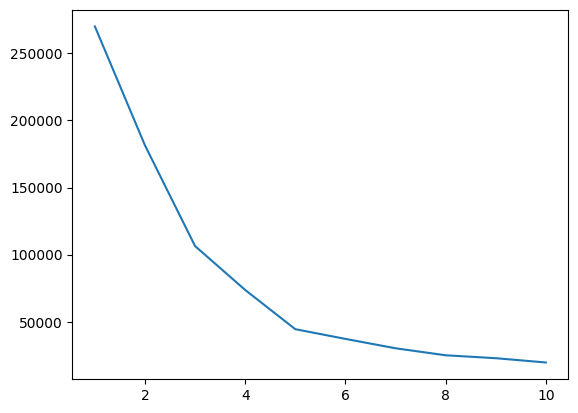

In [67]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)


In [76]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

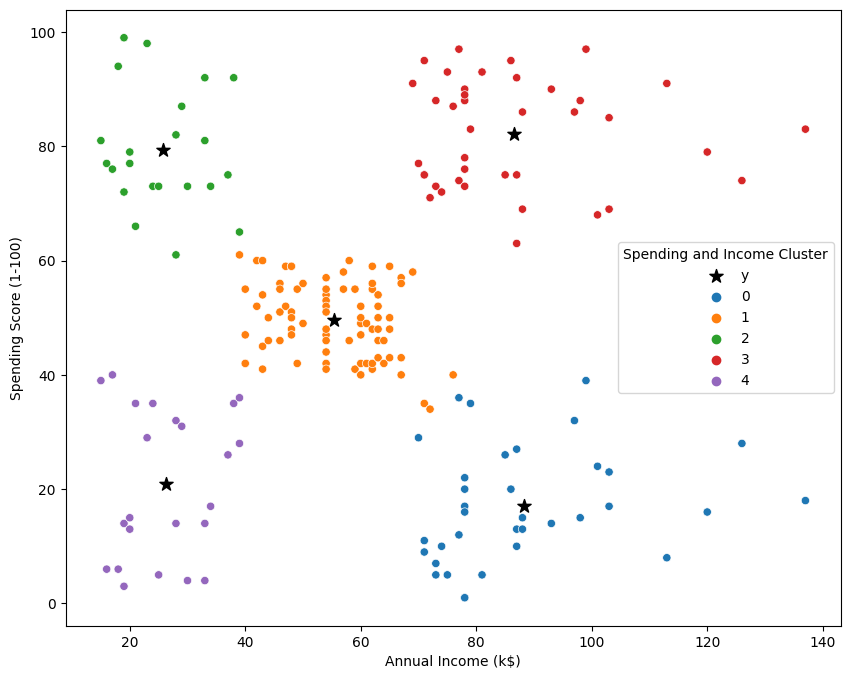

In [77]:
plt.figure(figsize=(10,8)) # to make fig bigger

# to add centroids
plt.scatter(data =centers, x='x',y='y',s=100,c='black',marker='*')

sns.scatterplot(data=df, 
                x ='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='Spending and Income Cluster',
                palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [78]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.590909,0.409091
3,0.538462,0.461538
4,0.608696,0.391304


In [ ]:
## conclusion
    - cluster 0(blue color in the above plot), has 45% female
    - cluster 1(orange color in the above plot), has 59% female
    - cluster 2(green color in the above plot), has 59% female
    - cluster 3(red color in the above plot), has 53% female
    - cluster 4(purple color in the above plot), has 60% female
    
    our ideal cluster will be red color one,
    because they have high spending score and high annual income.
    
    another ideal cluster will be green cluster. 
    even though, they have low income but they have high spending score. 
    our guess whould be they spend on game and tech accessories or makeup and young-related items, if their age is not high.

In [80]:
# we can check what is the average age of the red cluster
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,25.272727,25.727273,79.363636
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


## conclusion
    - average age for red group is 32 years.
    - our guess for group 2 was correct. they are young with mean age around 25 years.
    - we can arrange campaign around group purple and green. 
    - we can use customer id and dige more into what have been their purchases in order to increase seccess chance of our campaign.
    
    

## Mulivariate Clustering 

In [81]:
from sklearn.preprocessing import StandardScaler


scale = StandardScaler()
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income Cluster2,Spending and Income Cluster
0,Male,19,15,39,1,0,4
1,Male,21,15,81,1,0,2
2,Female,20,16,6,1,0,4
3,Female,23,16,77,1,0,2
4,Female,31,17,40,1,0,4


In [85]:
# change Gender to numerical
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income Cluster2,Spending and Income Cluster,Gender_Male
0,19,15,39,1,0,4,1
1,21,15,81,1,0,2,1
2,20,16,6,1,0,4,0
3,23,16,77,1,0,2,0
4,31,17,40,1,0,4,0


In [86]:
# no need cluster
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [89]:

dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()



,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


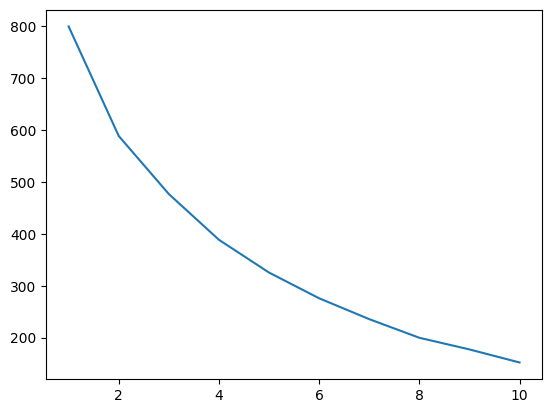

In [90]:
# on the whole dataframe

intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

### almost 4 would be ok as the number of clusters

In [91]:
df.to_csv('Clustering.csv')